<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [4]:
df = pd.read_csv('states_edu.csv')

Chosen test: **Math for 8th Graders**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [5]:
#Using the same renaming scheme as the crash course:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#Check how many valid math scores there are for 8 graders:
df.AVG_MATH_8_SCORE.notna().sum()
#Returns 602. This means there are 602 valid math averages.
#We'll remove the rest of them, since we can't use NaN in our model:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

#Fill in all the empty enrollments with their estimates, as done in the crash course:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [6]:
# We want the expenditures per student, since some schools may have more or less students but the same amount of money.
# This basically makes sure that the different enrollment counts don't affect our model as much.
df['INSTRUCTION_EXPENDITURE_PER_STUDENT']=df['INSTRUCTION_EXPENDITURE']/df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']=df['SUPPORT_SERVICES_EXPENDITURE']/df['ENROLL_ALL']
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT']=df['CAPITAL_OUTLAY_EXPENDITURE']/df['ENROLL_ALL']

Final feature list: **Instruction expenditure per student, support services expenditure per student, capital outlay expenditure per student**

Feature selection justification:
**I wanted to find out what the best way to spend the school's money is (in terms of 8th grade math scores) by finding which expenditure is correlated with the highest 8th grade math scores. By studying the three areas that the school can put their money into (instruction, support, capital outlay (maintainence)), we can see which correlates with a higher 8th grade math score.

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'Average math score for 8th graders')

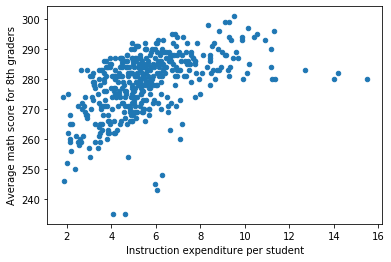

In [7]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Instruction expenditure per student')
plt.ylabel('Average math score for 8th graders')

**Instruction expenditure per student vs average math score for 8th graders. There appears to be a weak positive correlation.**

Visualization 2

Text(0, 0.5, 'Average math score for 8th graders')

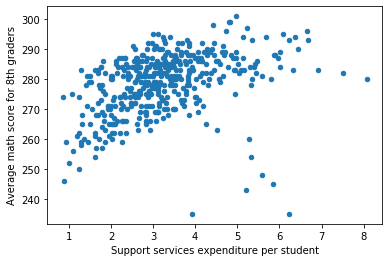

In [8]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Support services expenditure per student')
plt.ylabel('Average math score for 8th graders')

**Support services expenditure per student vs average math score for 8th graders. There doesn't appear to be a very strong correlation.**

Visualization 3 (I added this in)

Text(0, 0.5, 'Average math score for 8th graders')

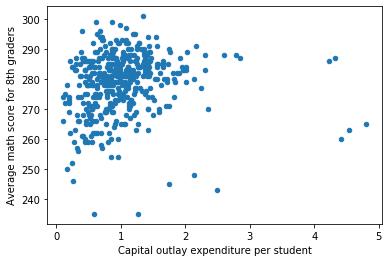

In [9]:
df.plot.scatter(x='CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Capital outlay expenditure per student')
plt.ylabel('Average math score for 8th graders')

**Capital outlay expenditure per student vs average math score for 8th graders. There appears to be little correlation, if any.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [13]:
# I chose linear regression since the coefficients can tell me which expenditure has the largest impact
from sklearn.linear_model import LinearRegression

In [14]:
# create your model here
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
#Show the intercept and coefficients
print(model.intercept_)
print(model.coef_)

267.8644260119541
[ 3.27598506 -1.95543964 -0.90846039]


In [18]:
#Get the R^2 value:
model.score(X_test, y_test)

0.3050767581209597

Text(0, 0.5, '8th Grade Math Score')

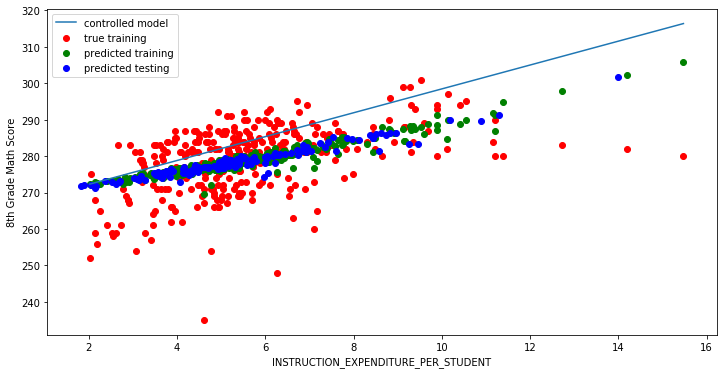

In [20]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')

<h2> Summary </h2>

The aim of this project was to determine which expenditure (per student) is correlated the most with higher 8th grade math scores. The three given categories of expenditure were instructional, support services, and capital outlay, so these were used as features after dividing each by the total enrollment to get the expenditure per student. First, through some exploratory data analysis, it was determined that instruction expenditure per student likely had a positive correlation with 8th grade math scores, while the other two did not have an apparent correlation. Then, a linear regression model was created with sklearn's machine learning library. The coefficients for instructional expenditures per student, support services expenditures per student, and capital outlay expenditures per student were 3.276, -1.955, and -0.908, respectively, though the R^2 value of 0.3 was not very high. However, this matches the findings from the exploratory data analysis, as the instructional expenditures per student is positively and more strongly correlated with higher 8th grade math scores. Therefore, if a school were to receive extra money and wanted to improve their 8th grade math scores, it would likely be best spent in instructional expenditures.